# Dogs of Zurich

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(palette='pastel',context='notebook', style='white')
from datetime import datetime

### Import Data

In [2]:
d2015 = pd.read_csv('data/20151001hundehalter.csv')
d2016 = pd.read_csv('data/20160307hundehalter.csv')
d2017 = pd.read_csv('data/20170308hundehalter.csv')
#metadata = pd.read_csv('data/zuordnungstabellehunderassehundetyp.csv')

### Merge Data and change column names

In [3]:
d2015.GEBURTSJAHR_HUND.value_counts()

2012    624
2013    589
2010    568
2009    560
2011    559
2014    554
2008    506
2007    490
2006    462
2005    443
2004    425
2003    329
2002    277
2015    192
2001    173
2000    118
1999     59
1998     33
1997     10
1995      1
1980      1
8         1
1         1
1994      1
1962      1
5012      1
2016      1
1996      1
Name: GEBURTSJAHR_HUND, dtype: int64

In [4]:
#Add dogs age to each DF before concating. 
#This will allow us to subtract the dog's birth year from the correct df's recorded year


d2015['Dog_Age']= 2015-d2015['GEBURTSJAHR_HUND']
d2016['Dog_Age']= 2016-d2016['GEBURTSJAHR_HUND']
d2017['Dog_Age']= 2017-d2017['GEBURTSJAHR_HUND']

In [5]:
df =pd.concat([d2015,d2016,d2017])
df.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE,Dog_Age
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun,4
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle,13
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun,3
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz,5
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss,4


In [6]:
df.columns=[
            'ID',
            'Age',
            'Gender',
            'City_District',
            'City_Quarter',
            'Primary_Breed',
            'Primary_Breed_Mixed',
            'Secondary_Breed',
            'Secondary_Breed_Mixed',
            'Breed_Type',
            'Dog_Birth_Year',
            'Dog_Gender',
            'Dog_Color',
            'Dog_Age']

In [7]:
df.head()

,ID,Age,Gender,City_District,City_Quarter,Primary_Breed,Primary_Breed_Mixed,Secondary_Breed,Secondary_Breed_Mixed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,Dog_Age
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun,4
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle,13
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun,3
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz,5
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss,4


### Initial Data Checks

In [8]:
print('Shape')
print(df.shape)
print('-----------------------')
print('Info')
print(df.info())
print('-----------------------')
print('Stats')     
print(df.describe().T)
print('-----------------------')
print('dtypes')
print(df.dtypes)

Shape
(21065, 14)
-----------------------
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21065 entries, 0 to 7154
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     21065 non-null  int64  
 1   Age                    21060 non-null  object 
 2   Gender                 21065 non-null  object 
 3   City_District          21060 non-null  float64
 4   City_Quarter           21060 non-null  float64
 5   Primary_Breed          21065 non-null  object 
 6   Primary_Breed_Mixed    1939 non-null   object 
 7   Secondary_Breed        1590 non-null   object 
 8   Secondary_Breed_Mixed  0 non-null      float64
 9   Breed_Type             20891 non-null  object 
 10  Dog_Birth_Year         21065 non-null  int64  
 11  Dog_Gender             21065 non-null  object 
 12  Dog_Color              21065 non-null  object 
 13  Dog_Age                21065 non-null  int64  
dtypes: float

# Questions
1. What trends exist between owners and dog breeds?
    -Age and breeds?
    -Gender and breeds?
    -Location and breeds?
2. is there a relationship between breed, dog gender and dog color?

# Cleaning Up the Data / Removing Nulls

In [9]:
#check for nulls
df.isnull().sum()/ df.shape[0] * 100

ID                         0.000000
Age                        0.023736
Gender                     0.000000
City_District              0.023736
City_Quarter               0.023736
Primary_Breed              0.000000
Primary_Breed_Mixed       90.795158
Secondary_Breed           92.451934
Secondary_Breed_Mixed    100.000000
Breed_Type                 0.826015
Dog_Birth_Year             0.000000
Dog_Gender                 0.000000
Dog_Color                  0.000000
Dog_Age                    0.000000
dtype: float64

### Secondary_Breed_Mixed

In [10]:
df.drop(columns='Secondary_Breed_Mixed',inplace=True)

### Primary_Breed_Mixed

Mischling is german for mixed, so we'll set those values to "mixed" and the others (na's) to "pure"

In [11]:
df.loc[df.Primary_Breed_Mixed=='Mischling','Primary_Breed_Mixed'] ='Mixed'
df.Primary_Breed_Mixed.fillna('Pure',inplace=True)

In [12]:
df.Primary_Breed_Mixed.unique()

array(['Pure', 'Mixed'], dtype=object)

### Age

In [13]:
df.Age.unique()

array(['51-60', '61-70', '41-50', '71-80', '31-40', '81-90', '21-30',
       '91-100', nan, '11-20'], dtype=object)

In [14]:
df[df.Age.isnull()].index

Int64Index([1348, 2556, 1273, 2407, 2234], dtype='int64')

In [15]:
#Since the missing are so small (.02 %), we'll delete those missing rows
df.drop(df[df.Age.isnull()].index,inplace=True)

In [16]:
df.Age.isnull().sum()

0

### City Quarter & City District


City Quarter and District are missing .009% of values. We'll just remove from the dataset

In [17]:

missingQ = df[df.City_Quarter.isnull()].index
missingD = df[df.City_District.isnull()].index
list(zip(missingQ,missingD))

[(36, 36), (34, 34)]

In [ ]:
#data missing from District is also missing for Quarter. Therefore we can just remove the index from missingQ
df.drop(index= missingQ,inplace=True)

### Breed Type

Droping null values, .52% of values are null

In [21]:
df.drop(df[df.Breed_Type.isnull()].index,inplace=True)

### Secondary Breed

In [22]:
df.Secondary_Breed.value_counts()

Labrador Retriever          119
Golden Retriever             67
Pudel                        67
Chihuahua                    64
Schäfer                      62
                           ... 
American Pitbull Terrier      1
Lhasa Apso                    1
Welsh Corgi                   1
Harzer Fuchs                  1
Podenco Ibicenco              1
Name: Secondary_Breed, Length: 130, dtype: int64

In [23]:
# do any na's exist when the primary breed does not equal pure? if no, then we can set Secondary Breed to "None"
df.loc[(df.Secondary_Breed.isnull()) & (df.Primary_Breed_Mixed != 'Pure')]

,ID,Age,Gender,City_District,City_Quarter,Primary_Breed,Primary_Breed_Mixed,Secondary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,Dog_Age
9,4215,41-50,w,8.0,81.0,Bergamasker,Mixed,NaN,I,2004,w,schwarz,11
10,4215,41-50,w,8.0,81.0,Border Collie,Mixed,NaN,I,2001,m,schwarz,14
11,4215,41-50,w,8.0,81.0,Bergamasker,Mixed,NaN,I,2001,w,grau/braun,14
12,4239,61-70,w,10.0,102.0,Pinscher,Mixed,NaN,K,2013,w,braun/schwarz,2
41,6629,51-60,w,4.0,41.0,Spitz,Mixed,NaN,K,1997,w,hellbraun,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,135039,21-30,w,11.0,111.0,Labrador Retriever,Mixed,NaN,I,2011,m,schwarz/weiss,6
7132,135618,31-40,m,9.0,91.0,Cocker Spaniel,Mixed,NaN,K,2016,m,choco,1
7145,135694,21-30,m,10.0,102.0,Spitz,Mixed,NaN,K,2014,w,braun,3
7148,135697,31-40,m,10.0,102.0,Labrador Retriever,Mixed,NaN,I,2012,m,braun/weiss,5


In [24]:
df.Secondary_Breed.fillna('None',inplace=True)

In [25]:
#investigate unique counts for each col
for col in df.columns[1:]:
    print(col)
    print(df[col].value_counts())
    print('----------------------')

Age
51-60     4440
41-50     4358
31-40     3860
61-70     3004
21-30     2296
71-80     1903
81-90      497
11-20      122
91-100      43
Name: Age, dtype: int64
----------------------
Gender
w    14127
m     6396
Name: Gender, dtype: int64
----------------------
City_District
11.0    3436
7.0     2917
9.0     2462
10.0    1987
3.0     1884
2.0     1788
12.0    1457
6.0     1451
4.0     1087
8.0     1082
5.0      620
1.0      352
Name: City_District, dtype: int64
----------------------
City_Quarter
92.0     1593
101.0    1366
111.0    1201
119.0    1198
115.0    1037
74.0     1027
21.0      874
91.0      869
61.0      793
31.0      788
72.0      727
71.0      686
63.0      655
34.0      642
122.0     631
102.0     621
24.0      552
42.0      511
123.0     495
73.0      477
33.0      454
44.0      411
83.0      383
23.0      362
82.0      358
81.0      341
121.0     331
52.0      324
51.0      296
11.0      191
41.0      162
13.0       83
14.0       55
12.0       23
4.0         3
6.0  

### Dog Birth Year and Dog Age

In [26]:
df.Dog_Birth_Year.unique()

array([2011, 2002, 2012, 2010, 2005, 2004, 2001, 2013, 2014, 2007, 2003,
       1999, 2000, 2009, 1997, 2008, 2006, 2015, 1998, 1995, 1980,    8,
          1, 1962, 5012, 2016, 1996, 1994, 2017])

In [45]:
df.Dog_Age.unique()

array([ 4, 13,  3,  5, 10, 11, 14,  2,  1,  8, 12, 16, 15,  6, 18,  7,  9,
        0, 17, 20, 19, 22, 21])

We'd normally investigate these more but due to low numvers of errors, we'll just remove records

In [29]:
df.drop(columns='Dog_Birth_Year',inplace=True)

In [41]:
df.loc[(df.Dog_Age<0) | (df.Dog_Age>34)].index

Int64Index([2659], dtype='int64')

In [44]:
df.drop(df.loc[(df.Dog_Age<0) | (df.Dog_Age>34)].index,inplace=True)

### Final things

In [46]:
#set Age to a category
df.Age = df.Age.astype('category')

In [47]:
#drop id column
df.drop(columns='ID',inplace=True)

In [48]:
df.Dog_Gender.replace({'w':'Female','m':'Male'},inplace=True)

In [49]:
df.head()

,Age,Gender,City_District,City_Quarter,Primary_Breed,Primary_Breed_Mixed,Secondary_Breed,Breed_Type,Dog_Gender,Dog_Color,Dog_Age
0,51-60,m,9.0,92.0,Welsh Terrier,Pure,None,K,Female,schwarz/braun,4
1,61-70,w,2.0,23.0,Cairn Terrier,Pure,None,K,Female,brindle,13
2,41-50,m,6.0,63.0,Labrador Retriever,Pure,None,I,Female,braun,3
3,61-70,w,7.0,71.0,Mittelschnauzer,Pure,None,I,Female,schwarz,5
4,51-60,m,10.0,102.0,Shih Tzu,Pure,None,K,Male,schwarz/weiss,4


# Main Question

# Scenario - You operate a dog shelter and, while some people come in and know exactly what sort of dog they want, there are a lot of others that need advice. You plan to use these demographics to make a dog recommendation

## First division: Gender of customer (assuming M/F divide based off data)

In [51]:
# Gender and dog breed / Mixed?
# Gender and dog gender
# Gender and dog color
# Gender and dog age

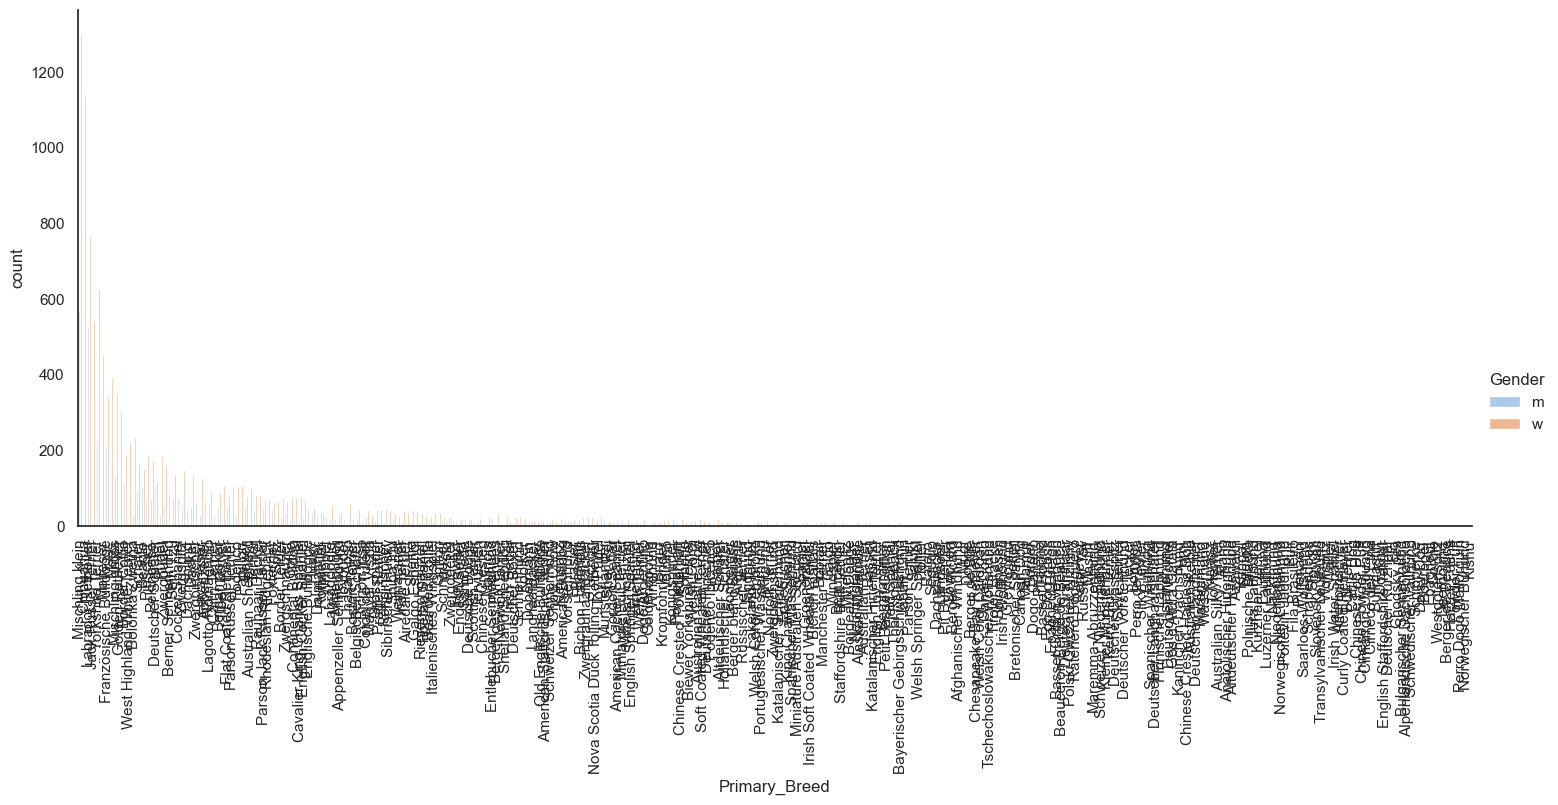

In [52]:
#Genearl view of dog breeds by gender. 
#This is a mess and it looks like a few dogs make up almost all the species reported.
plt.clf
large_to_small = df.groupby('Primary_Breed').size().sort_values().index[::-1]
sns.catplot(data=df,kind='count',x='Primary_Breed', hue ='Gender', height = 6, aspect = 2.5, order= large_to_small)
plt.xticks(rotation=90)
plt.show()

In [53]:
df.Primary_Breed.nunique()

311

In [54]:
Breed_Counts_df = pd.DataFrame(df.groupby('Primary_Breed')['Primary_Breed']\
                               .count().sort_values(ascending=False)).add_prefix('Counts_').reset_index()

Breed_Counts_df['Percent Total'] = (Breed_Counts_df.Counts_Primary_Breed / Breed_Counts_df.Counts_Primary_Breed.sum()) * 100


Breed_Counts_df['Cum_Percent'] = Breed_Counts_df['Percent Total'].cumsum()
counts_mask = Breed_Counts_df.loc[Breed_Counts_df.Cum_Percent<=75]

counts_mask.head()

,Primary_Breed,Counts_Primary_Breed,Percent Total,Cum_Percent
0,Mischling klein,1869,9.117518,9.117518
1,Chihuahua,1472,7.180838,16.298356
2,Labrador Retriever,1293,6.307625,22.605981
3,Jack Russel Terrier,857,4.180692,26.786673
4,Yorkshire Terrier,854,4.166057,30.952729


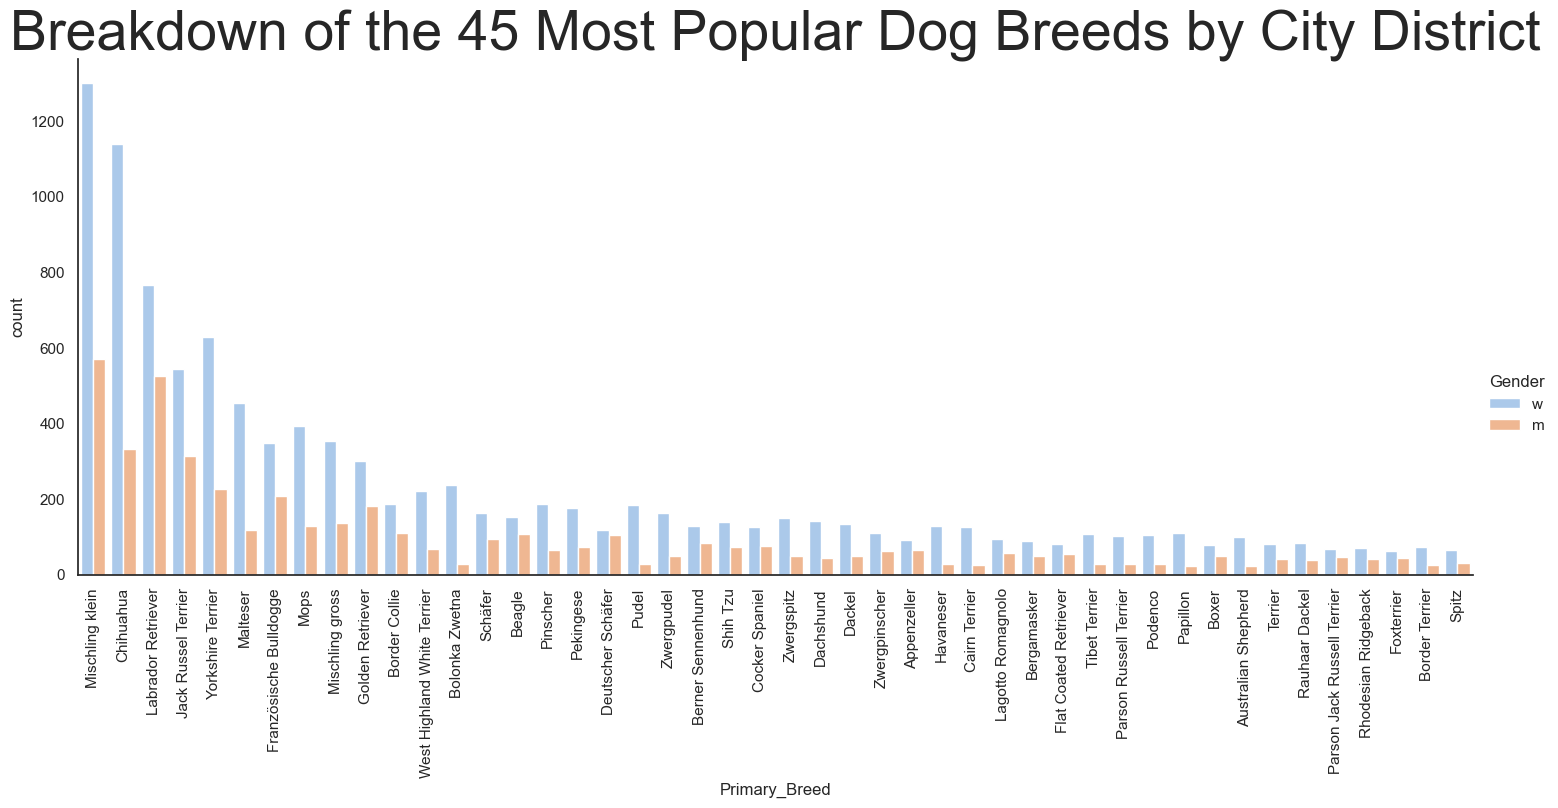

In [55]:
plt.clf
large_to_small = df.merge(counts_mask, on='Primary_Breed').groupby('Primary_Breed').size().sort_values().index[::-1]
sns.catplot(data=df.merge(counts_mask, on='Primary_Breed'),kind='count',x='Primary_Breed', hue ='Gender', height = 6, aspect = 2.5, order= large_to_small)
plt.xticks(rotation=90)
plt.title('Breakdown of the 45 Most Popular Dog Breeds by City District',fontsize=40)
plt.show()

Of the 311 Dog Breeds, 45 make up 75% of all dog ownership. We'll cut down our bar chart to only show these 45

# Main Question

# Scenario - You operate a dog shelter and, while some people come in and know exactly what sort of dog they want, there are a lot of others that need advice. You plan to use these demographics to make a dog recommendation

In [56]:
# Main Question

# Scenario - You operate a dog shelter and, while some people come in and know exactly what sort of dog they want, there are a lot of others that need advice. You plan to use these demographics to make a dog recommendation

In [57]:
df.Gender.value_counts() / 6395

w    2.205786
m    0.999687
Name: Gender, dtype: float64

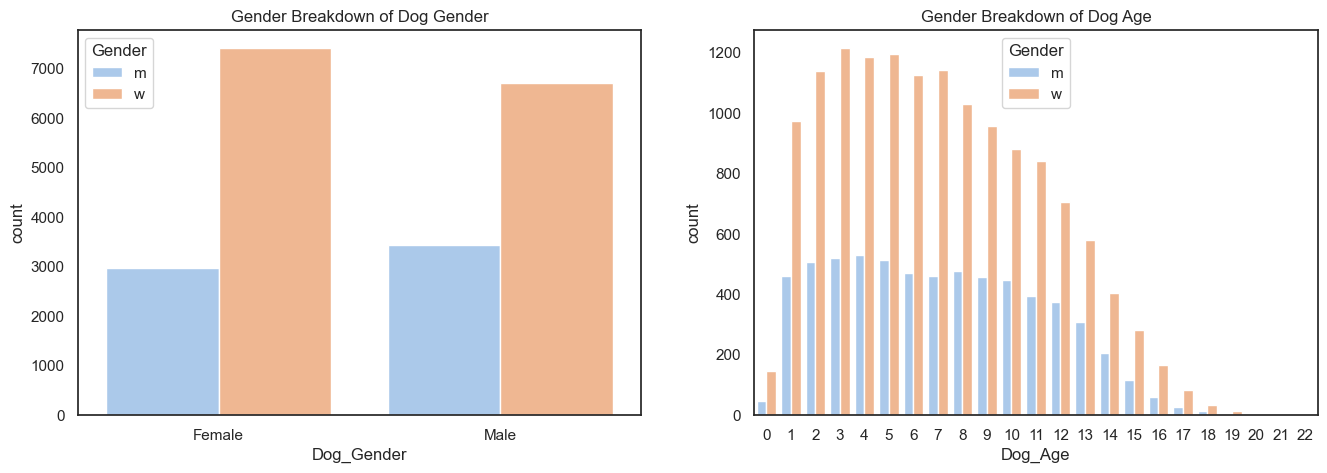

In [60]:
#gender and dog gender
plt.clf
fig, axs = plt.subplots(ncols=2, figsize=(16, 5))


sns.countplot(data = df, x='Dog_Gender',hue='Gender', palette='pastel', ax=axs[0])
axs[0].set_title('Gender Breakdown of Dog Gender')

_=sns.countplot(data = df, x='Dog_Age',hue='Gender', palette='pastel', ax=axs[1])
_=axs[1].set_title('Gender Breakdown of Dog Age')

It looks like Women are more likely to have a dog than Men. Human sex doesn't seem to impact Dog sex.(i.e men aren't more likely to own a male dog vs a female dog). 

Additionally, We have fewer old dogs (makes sense) with a releative normal distribution dog age for men and women

## Second division: Where does the customer live? (given Gender)

In [ ]:
sns.catplot(data=df,kind='count',x='City_District',hue='Gender',order=large_to_small_pop)

large_to_small_pop = df.groupby('City_District').size().sort_values().index[::-1]
_=plt.title('Dog Owners for Each City District')


In [ ]:
#Make pie charts here

plt.clf
large_to_small = df.merge(counts_mask, on='Primary_Breed').groupby('Primary_Breed').size().sort_values().index[::-1]
sns.catplot(data=df.merge(counts_mask, on='Primary_Breed'),kind='count',x='Primary_Breed', hue ='City_District', height = 6, aspect = 2.5, order= large_to_small)
plt.xticks(rotation=90)
plt.title('Breakdown of the 45 Most Popular Dog Breeds by City District',fontsize=20)
plt.show()

In [ ]:
g=sns.catplot(kind='count',data=df.merge(counts_mask, on='Primary_Breed'), x='Primary_Breed',order = large_to_small, col='City_District',col_wrap=2,height=6,aspect=4.5,sharex=False)
g.set_xticklabels(rotation=90)
[ax.set_xlabel('Breeds',fontsize=20) for ax in g.axes.flat]
[ax.set_ylabel('Counts',fontsize=20) for ax in g.axes.flat]
plt.suptitle('Dogs by Districts', fontsize=40)
g.fig.tight_layout()

plt.show()


In [ ]:
district_breed_counts = pd.DataFrame(df.groupby(['City_District','Primary_Breed'])['Primary_Breed'].count()).add_prefix('Counts_').reset_index().sort_values(['City_District','Counts_Primary_Breed'],ascending=[True,False])

district_breed_counts['Rank'] = district_breed_counts.groupby('City_District')['Counts_Primary_Breed'].rank('dense',ascending=False)

district_breed_counts.loc[district_breed_counts.Rank<=5][['City_District','Primary_Breed']]


A breakdown of the 45 most popular dog breeds per district

## Third division: Age customer (given Gender)

In [ ]:
# Age and breed
# Age and dog gender
# Age and dog color
# Age and dog age

In [ ]:
# gender by age for dog owners
plt.clf
sns.catplot(data=df,kind='count',x='Age',hue='Gender')
plt.title('How Gender is represented by Age')
plt.show()

In [ ]:
df.Age.mode()

In [ ]:
sns.catplot(kind='count',data=df, x='Age',col='City_District',col_wrap=4,sharex=False)
plt.show()

This distribution of Ages in each district is relativiely uniformed with the largest sector veing 41-60 year olds. Meaning these is the age group most likely to have a dog. 

In [ ]:
#do older people have older dogs?
plt.clf
sns.catplot(kind='bar',data=df, x="Age", y="Dog_Age",hue='Gender',ci=None)
plt.title('Age of Owners vs Age of Dogs')
plt.xlabel("Owner Age Groups")
plt.ylabel('Average Dog Age')
plt.show()